In [1]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
%matplotlib inline

In [2]:
cdc_zika = pd.read_csv("cdc_zika.csv", usecols=['report_date','location','data_field','value'])

/Users/ezinnenwankwo/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cdc_zika.iloc[100550:]

,report_date,location,data_field,value
100550,2016-04-23,El_Salvador,cumulative_suspected_age_10-19,583
100551,2016-04-23,El_Salvador,cumulative_suspected_age_20-29,1594
100552,2016-04-23,El_Salvador,cumulative_suspected_age_30-39,1492
100553,2016-04-23,El_Salvador,cumulative_suspected_age_40-49,1101
100554,2016-04-23,El_Salvador,cumulative_suspected_age_50-59,626
100555,2016-04-23,El_Salvador,cumulative_suspected_age_60_plus,274
100556,2016-04-23,El_Salvador-Sonsonate,cumulative_suspected_pregnant,4
100557,2016-04-23,El_Salvador-San_Miguel,cumulative_suspected_pregnant,7
100558,2016-04-23,El_Salvador-Cabanas,cumulative_suspected_pregnant,26
100559,2016-04-23,El_Salvador-Cuscatlan,cumulative_suspected_pregnant,17


In [4]:
# make USA dataframe
path = 'zika-master/United_States/CDC_Report/data'
cdcUSA_files = glob.glob(path + "/*.csv")

cdcUSA = pd.DataFrame()
cdcUSA_list = []

for file_ in cdcUSA_files:
    df = pd.read_csv(file_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
#    df['date'] = [str(file_)[-14:-4]]*len(df)
    cdcUSA_list.append(df)
    
cdcUSA = pd.concat(cdcUSA_list)
cdcUSA.report_date = pd.to_datetime(cdcUSA['report_date'])
cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)

In [5]:
cdcUSA_travel = cdcUSA[cdcUSA.data_field == 'zika_reported_travel']
cdcUSA_local = cdcUSA[cdcUSA.data_field == 'zika_reported_local']

In [6]:
cdcUSA_travel_Florida = cdcUSA_travel[cdcUSA_travel.location == 'United_States-Florida']
cdcUSA_local_Florida = cdcUSA_local[cdcUSA_local.location == 'United_States-Florida']
cdcUSA_travel_Texas = cdcUSA_travel[cdcUSA_travel.location == 'United_States-Texas']
cdcUSA_local_Texas = cdcUSA_local[cdcUSA_local.location == 'United_States-Texas']

In [7]:
cdcUSA_travel_Florida

,report_date,location,data_field,value,total_value
12,2016-02-24,United_States-Florida,zika_reported_travel,28,147
15,2016-03-02,United_States-Florida,zika_reported_travel,42,261
15,2016-03-09,United_States-Florida,zika_reported_travel,49,367
14,2016-03-16,United_States-Florida,zika_reported_travel,59,544
17,2016-03-23,United_States-Florida,zika_reported_travel,70,559
16,2016-03-30,United_States-Florida,zika_reported_travel,74,662
18,2016-04-06,United_States-Florida,zika_reported_travel,78,700
19,2016-04-13,United_States-Florida,zika_reported_travel,82,833
19,2016-04-20,United_States-Florida,zika_reported_travel,84,891
18,2016-05-18,United_States-Florida,zika_reported_travel,109,1380


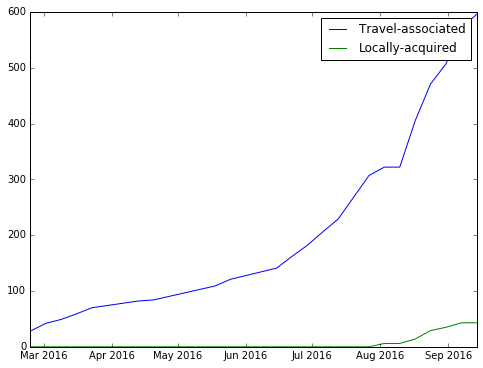

In [8]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA_travel_Florida.report_date, cdcUSA_travel_Florida.value, label='Travel-associated')
ax.plot(cdcUSA_local_Florida.report_date, cdcUSA_local_Florida.value, label='Locally-acquired')
plt.legend()

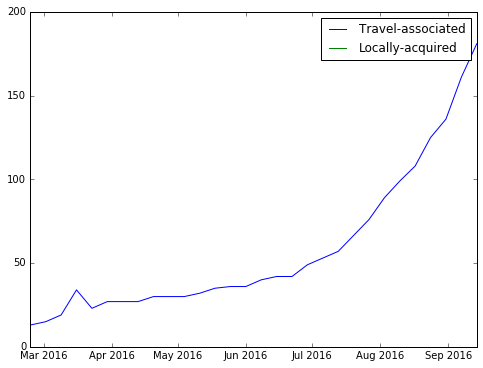

In [9]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA_travel_Texas.report_date, cdcUSA_travel_Texas.value, label='Travel-associated')
ax.plot(cdcUSA_local_Texas.report_date, cdcUSA_local_Texas.value, label='Locally-acquired')
plt.legend()

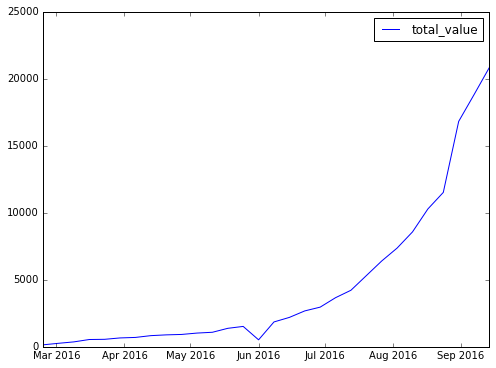

In [10]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA.report_date, cdcUSA.total_value)
#ax.plot(cdcUSA_local_Texas.report_date, cdcUSA_local_Texas.value, label='Locally-acquired')
plt.legend()

In [11]:
# make Brazil dataframe
path = 'zika-master/Brazil/Epidemiological_Bulletin/data'
allFiles = glob.glob(path + "/*.csv")

cdcBrazil = pd.DataFrame()
dfList = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    dfList.append(df)
    
cdcBrazil = pd.concat(dfList)
cdcBrazil.report_date = pd.to_datetime(cdcBrazil['report_date'])

In [12]:
cdcBrazil['total_value'] = cdcBrazil.groupby('report_date')['value'].transform(sum)

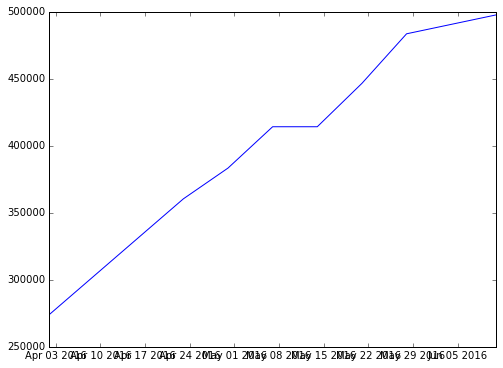

In [13]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcBrazil.report_date, cdcBrazil.total_value)

In [14]:
cdc_zika.dropna(inplace=True)

In [15]:
cdcElSal = cdc_zika[cdc_zika.location=='El_Salvador']
cdcElSal = cdcElSal[(cdcElSal.data_field == 'cumulative_suspected_total')]

In [16]:
cdcFran = cdc_zika[cdc_zika.location.str.contains('France')]

In [17]:
cdcElSal

,report_date,location,data_field,value
99720,2015-11-28,El_Salvador,cumulative_suspected_total,851
99738,2015-12-05,El_Salvador,cumulative_suspected_total,864
99765,2015-12-12,El_Salvador,cumulative_suspected_total,1716
99794,2015-12-19,El_Salvador,cumulative_suspected_total,2773
99825,2015-12-27,El_Salvador,cumulative_suspected_total,3836
99860,2016-01-09,El_Salvador,cumulative_suspected_total,492
99893,2016-01-16,El_Salvador,cumulative_suspected_total,1561
99927,2016-01-23,El_Salvador,cumulative_suspected_total,2474
99962,2016-01-30,El_Salvador,cumulative_suspected_total,3302
100002,2016-02-06,El_Salvador,cumulative_suspected_total,4087


In [18]:
cdcGuat =cdc_zika[cdc_zika.location=='Guatemala']
cdcGuat = cdcGuat[(cdcGuat.data_field=='total_zika_suspected_cumulative')]

In [19]:
cdcGuat

,report_date,location,data_field,value
100724,2015-12-23,Guatemala,total_zika_suspected_cumulative,21
100733,2015-12-29,Guatemala,total_zika_suspected_cumulative,21
100743,2016-01-14,Guatemala,total_zika_suspected_cumulative,200
100761,2016-01-26,Guatemala,total_zika_suspected_cumulative,78
100771,2016-02-02,Guatemala,total_zika_suspected_cumulative,112
100797,2016-02-09,Guatemala,total_zika_suspected_cumulative,174
100812,2016-02-16,Guatemala,total_zika_suspected_cumulative,318
100848,2016-02-23,Guatemala,total_zika_suspected_cumulative,445
100891,2016-03-01,Guatemala,total_zika_suspected_cumulative,529
100957,2016-03-08,Guatemala,total_zika_suspected_cumulative,592


In [20]:
cdcHait =cdc_zika[cdc_zika.location=='Haiti']

In [21]:
cdcHait

,report_date,location,data_field,value
101237,2016-02-03,Haiti,total_zika_new_suspected_cumulative,329


In [22]:
cdcMex =cdc_zika[cdc_zika.location=='Mexico']

In [23]:
cdcMex

,report_date,location,data_field,value


In [24]:
cdcMexico = cdc_zika[cdc_zika.location.str.contains('Mexico-')]
cdcMexico = cdcMexico[(cdcMexico.data_field == 'yearly_cumulative_male') | (cdcMexico.data_field == 'yearly_cumulative_female')]

In [25]:
cdcMexico

,report_date,location,data_field,value
101270,2015-11-28,Mexico-Aguascalientes,yearly_cumulative_female,0
101271,2015-11-28,Mexico-Baja_California,yearly_cumulative_female,0
101272,2015-11-28,Mexico-Baja_California_Sur,yearly_cumulative_female,0
101273,2015-11-28,Mexico-Campeche,yearly_cumulative_female,0
101274,2015-11-28,Mexico-Chiapas,yearly_cumulative_female,0
101275,2015-11-28,Mexico-Chihuahua,yearly_cumulative_female,0
101276,2015-11-28,Mexico-Coahuila_de_Zaragoza,yearly_cumulative_female,0
101277,2015-11-28,Mexico-Colima,yearly_cumulative_female,0
101278,2015-11-28,Mexico-Distrito_Federal,yearly_cumulative_female,0
101279,2015-11-28,Mexico-Durango,yearly_cumulative_female,0


In [26]:
print 'Total number of cases in Mexico:',cdcMexico['value'].values.sum()

Total number of cases in Mexico: 4765.0


In [27]:
cdcMexico.report_date.unique()

array(['2015-11-28', '2015-12-05', '2015-12-12', '2015-12-19',
       '2015-12-26', '2016-01-02', '2016-01-09', '2016-01-16',
       '2016-01-23', '2016-01-30', '2016-02-06', '2016-02-13',
       '2016-02-20', '2016-02-27', '2016-03-05', '2016-03-12',
       '2016-03-19', '2016-03-26', '2016-04-02', '2016-04-09',
       '2016-04-16', '2016-04-23', '2016-04-30', '2016-05-07',
       '2016-05-14', '2016-05-21', '2016-05-28', '2016-06-04',
       '2016-06-11', '2016-06-18'], dtype=object)

In [61]:
#Values of incidents
guat_value = cdcGuat.value.values
elsal_value = cdcElSal.value.values
haiti_value = cdcHait.value.values
mex_value = cdcMexico.value.values

In [79]:
#import math 

guat_value_log =[]
for i in range(len(guat_value)): 
    guat_value_log.append(math.log(guat_value[i]))
    
elsal_value_log =[]
for i in range(len(elsal_value)): 
    elsal_value_log.append(math.log(elsal_value[i]))
    
haiti_value_log =[]
for i in range(len(haiti_value)): 
    haiti_value_log.append(math.log(haiti_value[i]))
    
mex_value_log =[]
for i in range(len(mex_value)): 
    mex_value_log.append(math.log(mex_value[i]))
    

ValueError: math domain error

In [81]:
print len(mex_value)

1920


In [63]:
#Cleaning Report Dates
#Guatemala
dates_guat = cdcGuat['report_date'].values

print dates_guat[:10]

import datetime as dt

x_guat = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_guat]

#El Salvador
dates_elsal = cdcElSal['report_date'].values
x_elsal = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_elsal]

#Haiti
dates_hait = cdcHait['report_date'].values
x_hait = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_hait]

#Mexico
dates_mex = cdcMexico['report_date'].values
x_mex = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_mex]


['2015-12-23' '2015-12-29' '2016-01-14' '2016-01-26' '2016-02-02'
 '2016-02-09' '2016-02-16' '2016-02-23' '2016-03-01' '2016-03-08']


In [60]:
len(cdcElSal.report_date)

26

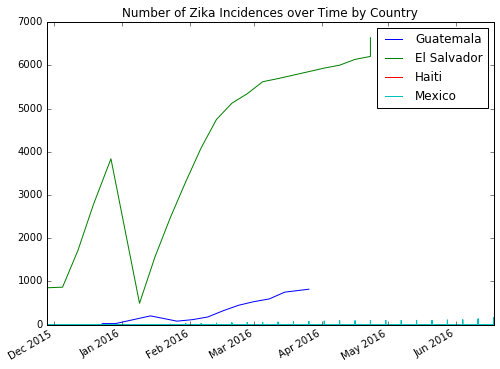

In [67]:
fig = plt.figure(figsize=(8,6))

import matplotlib.dates as mdates

plt.plot(x_guat,guat_value,label = 'Guatemala')
plt.plot(x_elsal,elsal_value, label = 'El Salvador')
plt.plot(x_hait,haiti_value, label = 'Haiti')
plt.plot(x_mex, mex_value, label = "Mexico")
plt.legend()
plt.title("Number of Zika Incidences over Time by Country")
plt.gcf().autofmt_xdate()